In [2]:
import cdflib
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from pathlib import Path
os.chdir(r'D:/ISRO Hackthon')

Reading AL1_ASW91_L2_BLK_20240801_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240802_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240803_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240804_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240805_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240806_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240807_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240808_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240809_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240810_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240811_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240812_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240813_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240814_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240815_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240816_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240817_UNP_9999_999999_V01.cdf
Reading AL1_AS

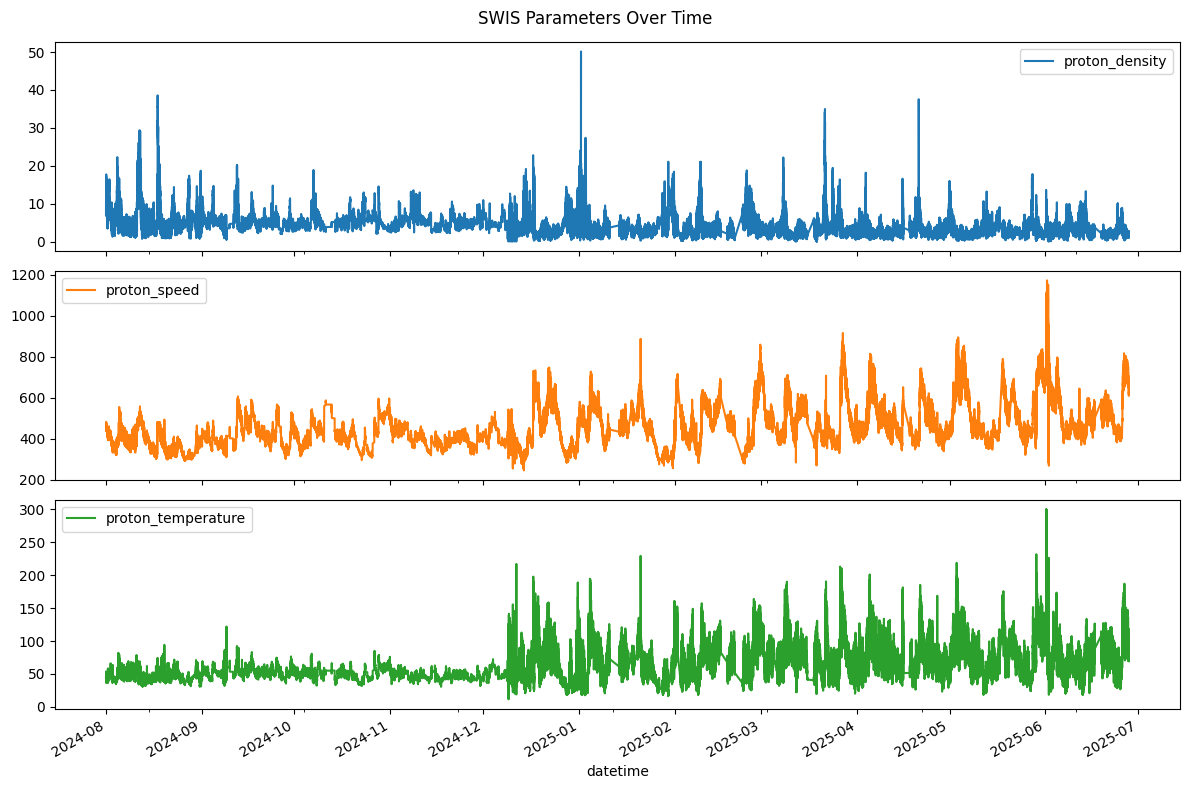

In [3]:
data_folder = Path("HaloCMEs/Data") #Creat4es a Path object pointing to the directory
all_data = []

for file_path in sorted(data_folder.glob("*.cdf")): #Iterates through every file with CDF format
    print(f"Reading {file_path.name}")
    try:
        cdf_file = cdflib.CDF(str(file_path)) 
        try:
            timestamps = cdf_file.varget('epoch_for_cdf_mod') #Newer files
        except:
            timestamps = cdf_file.varget('epoch_for_cdf') #Older files (names were different idk why)
        
        datetime_vals = cdflib.cdfepoch.to_datetime(timestamps) #Coverting the data to numpy64 format
        datetime_python = pd.to_datetime(datetime_vals) #Coverting the numpy64 format to our understanding of date and time YYMMDD
        
        proton_density = cdf_file.varget('proton_density')

        try:
            proton_speed = cdf_file.varget('proton_bulk_speed') #Newer files
        except:
            proton_speed = cdf_file.varget('proton_bulk') #Older files
        
        proton_temp = cdf_file.varget('proton_thermal')

        #Creating a data frame using the pandas library. A Data Frame is a like an excel with rows and columns
        df_day = pd.DataFrame({
            'datetime': datetime_python,
            'proton_density': proton_density,
            'proton_speed': proton_speed,
            'proton_temperature': proton_temp
        })

        df_day.replace(-1.0e+31, pd.NA, inplace = True) #Sometimes CDF files use extremely large negative numbers to represent missing values
        #The part "pd.NA" is way of marking missing data
        df_day.dropna(inplace=True) #Removes any row with atleast one missing value after you make it null using the pandas library
        all_data.append(df_day) #add the data we cleaned to our list.
    except Exception as e:
        print(f"Error Reading {file_path.name}")
df = pd.concat(all_data).sort_values('datetime')
df.set_index('datetime', inplace=True)

# Plotting
df.plot(subplots=True, figsize=(12, 8), title="SWIS Parameters Over Time")
plt.tight_layout()
plt.legend()
plt.show()

In [4]:
#This is where I have found the new and old files had different names for the variables although i don't know why
for file_path in sorted(Path("HaloCMEs/Data").glob("*.cdf")):
    print(f"\n File: {file_path.name}")
    try:
        cdf = cdflib.CDF(str(file_path)) #Open the CDF file
        variables = cdf.cdf_info().zVariables
        print("Available Variables: ")
        for v in variables:
            print(" -", v)
    except Exception as e:
        print(f"Error reading {file_path.name}: {e}")



 File: AL1_ASW91_L2_BLK_20240801_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spacecraft_ypos
 - spacecraft_zpos

 File: AL1_ASW91_L2_BLK_20240802_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spacecraft_ypos
 - spacecraft_zpos

 File: AL1_ASW91_L2_BLK_20240803_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spacecraft_ypos
 - spacecraft_zpos

 File: AL1_ASW91_L2_BLK_20240804_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spa

In [7]:
# Reading the SOHO data files to identify Halo CMEs
halo_cme_times = []  # We'll collect timestamps of Halo CMEs to match them with Aditya-L1 observations

soho_folder = Path("HaloCMEs/SOHOData")  # Path to the folder containing SOHO CME text data
for file_path in sorted(soho_folder.glob("*.txt")):  # Loop through all .txt files in sorted order
    print(f"📄 Parsing {file_path.name}")
    with open(file_path, "r") as file:  # Open each file for reading
        for line in file:
            # Check for lines that start with a year (i.e., data entries from 2024 or 2025)
            if line.strip().startswith("2024") or line.strip().startswith("2025"):
                try:
                    date_str = line[0:10].strip()      # Extract date in YYYY/MM/DD format
                    time_str = line[11:19].strip()     # Extract time in HH:MM:SS format
                    pa = line[20:28].strip()           # Extract Central Position Angle (or 'Halo')
                    width = line[29:36].strip()        # Extract Angular Width

                    # Check if the event is a full Halo CME
                    if "Halo" in pa and width == "360":
                        # Combine date and time into a datetime object
                        dt = datetime.strptime(f"{date_str} {time_str}", "%Y/%m/%d %H:%M:%S")
                        halo_cme_times.append(dt)  # Store the timestamp
                except Exception as e:
                    # Log the line that caused an error
                    print(f"❌ Failed on line: {line.strip()} ({e})")

# Remove duplicates and sort all detected CME times chronologically
halo_cme_times = sorted(set(halo_cme_times))

# Display results
print(f"\n✅ Total Halo CMEs detected: {len(halo_cme_times)}")
for t in halo_cme_times[:5]:  # Preview the first few entries
    print("  →", t)


📄 Parsing univ2024_01.txt
📄 Parsing univ2024_02.txt
📄 Parsing univ2024_03.txt
📄 Parsing univ2024_04.txt
📄 Parsing univ2024_05.txt
📄 Parsing univ2024_06.txt
📄 Parsing univ2024_07.txt
📄 Parsing univ2024_08.txt
📄 Parsing univ2024_09.txt
📄 Parsing univ2024_10.txt
📄 Parsing univ2024_11.txt
📄 Parsing univ2024_12.txt
📄 Parsing univ2025_01.txt
📄 Parsing univ2025_02.txt
📄 Parsing univ2025_03.txt

✅ Total Halo CMEs detected: 110
  → 2024-01-02 11:12:00
  → 2024-01-04 00:00:00
  → 2024-01-20 06:24:00
  → 2024-01-20 09:12:00
  → 2024-01-21 00:24:00
